In [1]:
#IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
mars = pd.read_csv('Netflix Userbase.csv')

In [4]:
mars.shape

(2500, 10)

In [5]:
mars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
#let's check the amount of empty cells in the dataset

mars.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [7]:
mars.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [8]:
#Sorting by join date

mars.sort_values(by = 'Join Date', ascending = True)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
35,36,Premium,15,01-03-22,27-06-23,France,35,Male,Tablet,1 Month
185,186,Premium,12,01-03-22,25-06-23,France,33,Female,Smart TV,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
462,463,Standard,11,01-06-22,26-06-23,United Kingdom,40,Male,Smart TV,1 Month
111,112,Basic,10,01-06-22,28-06-23,Canada,33,Female,Laptop,1 Month
...,...,...,...,...,...,...,...,...,...,...
987,988,Standard,12,31-10-22,02-07-23,United Kingdom,40,Female,Smartphone,1 Month
1684,1685,Basic,15,31-10-22,07-07-23,Italy,46,Male,Laptop,1 Month
993,994,Premium,11,31-10-22,02-07-23,Spain,45,Male,Tablet,1 Month
1475,1476,Premium,10,31-10-22,07-07-23,Spain,45,Female,Tablet,1 Month


In [9]:
#This will help us get the unique(various) types of subscription done by each individual

mars['Subscription Type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [10]:
#Subscription plan duration

mars["Plan Duration"].unique()

array(['1 Month'], dtype=object)

In [11]:
#This is will help us with the minimum age of the different subscribers

mars['Age'].min()

26

In [12]:
#This is will help us with the maximum age of the different subscribers

mars['Age'].max()

51

In [13]:
#This will help us idetify the gender with the highest subscription on our data.

mars['Gender'].value_counts()

Female    1257
Male      1243
Name: Gender, dtype: int64

In [14]:
#To know the devices which subscribers are watching from

mars['Device'].unique()

array(['Smartphone', 'Tablet', 'Smart TV', 'Laptop'], dtype=object)

In [15]:
mars['Country'].value_counts()

United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: Country, dtype: int64

In [16]:
mars['Subscription Type'].value_counts()

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

# VISUALIZATION

<Axes: xlabel='Country', ylabel='Count'>

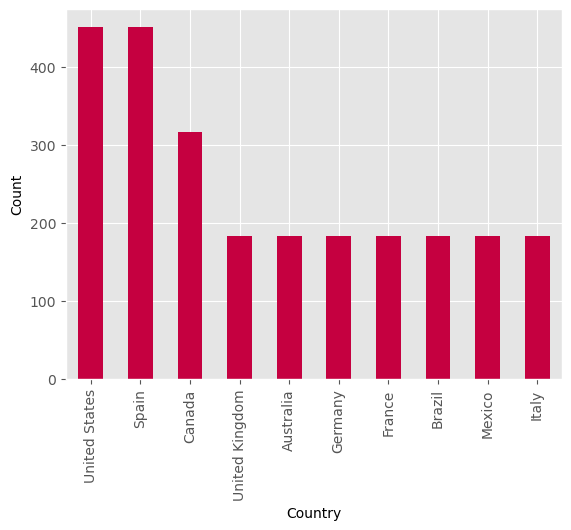

In [17]:
#This shows the chart of subscribers and their different countries(i.e In[15])

mars['Country'].value_counts().plot(kind='bar', xlabel='Country', ylabel='Count',color='#C50040')

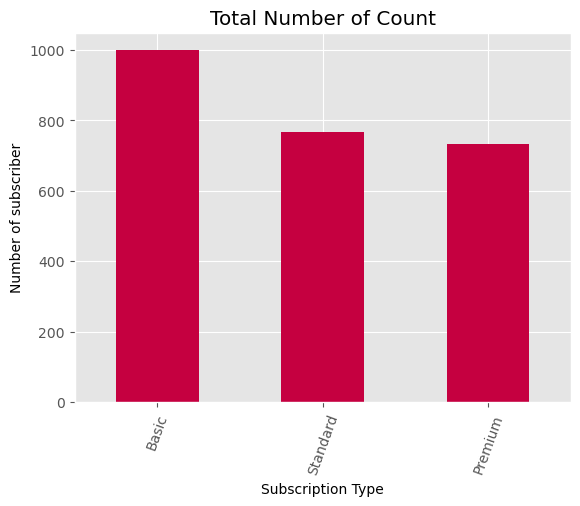

In [18]:
#This chart shows thew number of subscribers for each Subscription type (i.e In[16])

mars['Subscription Type'].value_counts().plot(kind='bar', xlabel='Subscription Type', rot = 70, ylabel='Count',color='#C50040')
plt.title('Total Number of Count')
plt.xlabel('Subscription Type')
plt.ylabel('Number of subscriber')
plt.show()

Text(0, 0.5, 'count')

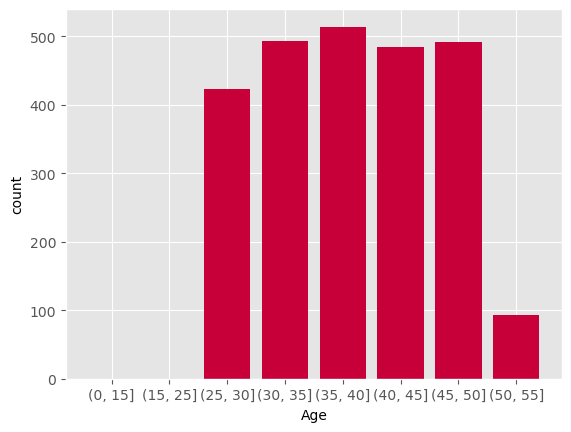

In [19]:
#Sorting the age grade according to their subscription.
#NB: It should equal the total number of subscribers(2500)

bins = [0, 15, 25, 30, 35, 40, 45, 50, 55]
age_groups = pd.cut(mars['Age'], bins=bins)
age_counts = age_groups.value_counts().sort_index()

plt.bar(age_counts.index.astype(str), age_counts.values,color='#C70039')
plt.xlabel('Age')
plt.ylabel('count')

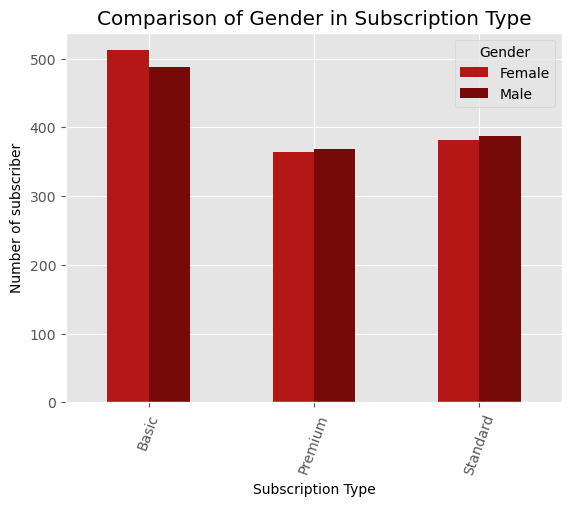

In [20]:
#This shows the various subscription types and by the highest subscribed gender  

count = mars.groupby(['Subscription Type','Gender']).size().unstack(fill_value = 10)
color = ['#b51616', '#780909']
count.plot(kind = 'bar',color = color, rot = 70)
plt.title('Comparison of Gender in Subscription Type')
plt.ylabel('Number of subscriber')
plt.show()

<Axes: xlabel='Device Type', ylabel='Count'>

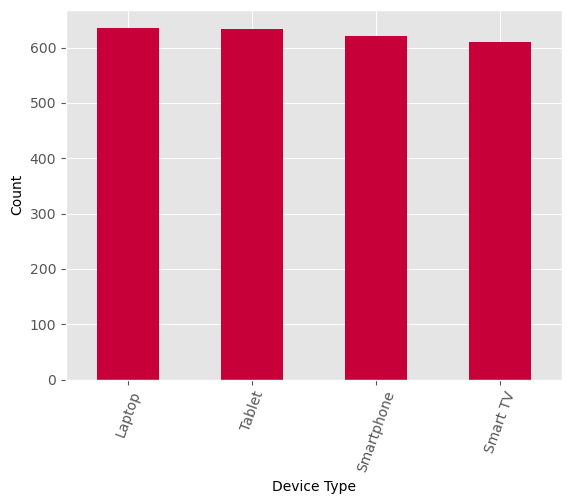

In [21]:
#This shows the various count of devices

mars['Device'].value_counts().plot(kind='bar', xlabel='Device Type', ylabel='Count', rot = 70, color='#C70039')

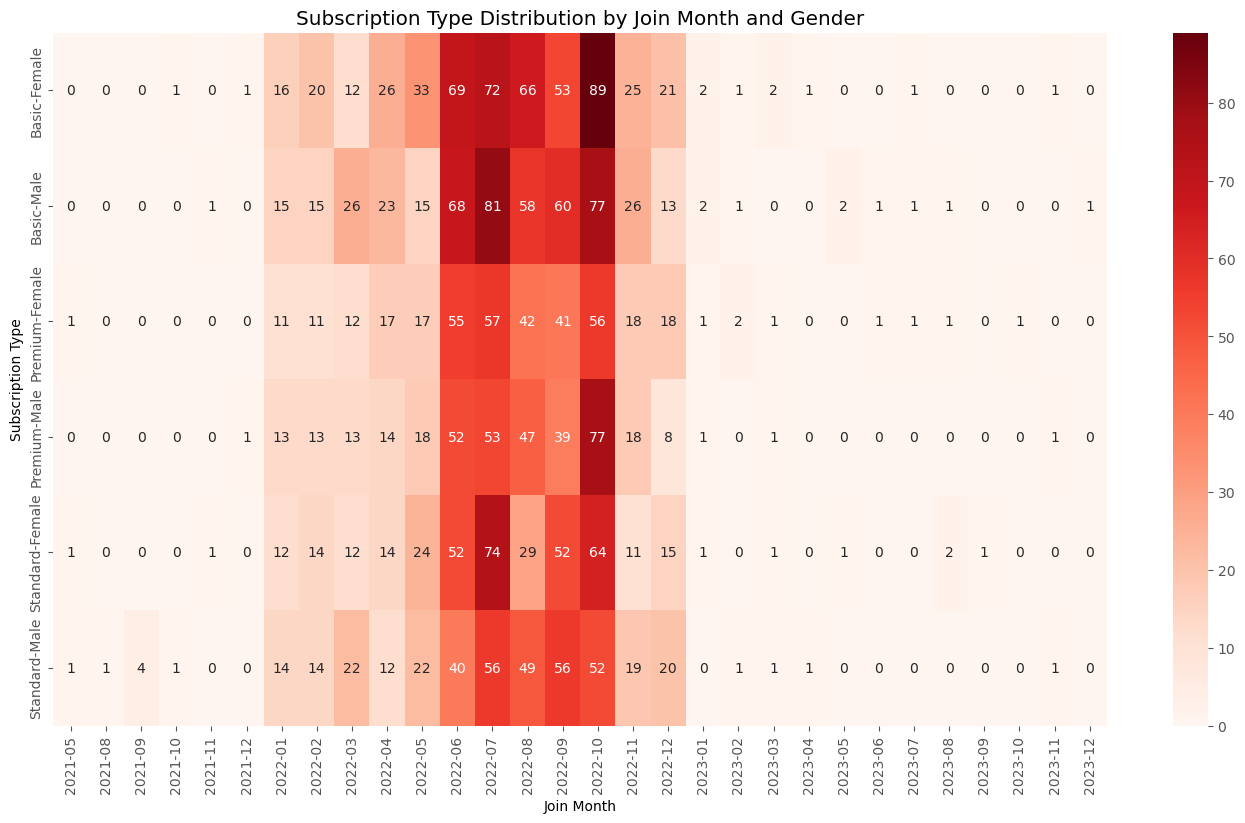

In [33]:
#This is the distribution of subscription types by join month and gender

mars['Join Date'] = pd.to_datetime(mars['Join Date'])
mars['Join Month'] = mars['Join Date'].dt.to_period('M')
mx = mars.groupby(['Subscription Type', 'Gender', 'Join Month']).size().unstack(fill_value=0)
plt.figure(figsize=(17, 9))
sns.heatmap(mx, cmap='Reds', annot=True, fmt='d')
plt.xlabel('Join Month')
plt.ylabel('Subscription Type')
plt.title('Subscription Type Distribution by Join Month and Gender')
plt.show()